In [6]:
import csv

filename = "GLT_filtered.csv"

read_cols = False
cols = []
cities = []
data = {}
with open(filename) as f:
    for row in csv.reader(f):
        # if i'm on the header row
        if read_cols == False:
            cols = row
            read_cols = True
            city_idx = cols.index("City")
            continue
        
        # get me the city
        the_city = row[city_idx]
        
        # if is the first time I see this city
        if data.get(the_city) == None:
            data[the_city] = {}
            for i,col in enumerate(cols):
                if col == "City":
                    continue
                data[the_city][col] = []
            
        # load row data
        for i,col in enumerate(cols):
            if col == "City":
                continue
            data[the_city][col].append(row[i])
            


In [16]:
for city, city_data in data.items():
    for i,t in enumerate(city_data['AverageTemperature']):
        if t == "":
            prec = ""
            succ = ""
            
            # GET PREC
            j = 1
            while prec == "":
                prec = city_data['AverageTemperature'][i-j]
                if i-j < 0:
                    prec = 0
                j += 1
            
            # GET SUCC
            j = 1
            while succ == "":
                succ = city_data['AverageTemperature'][i+j]
                if i+j > len(city_data['AverageTemperature']) -1:
                    succ = 0
                j += 1
                
            city_data['AverageTemperature'][i] = (float(succ) + float(prec))/2
        else:
            city_data['AverageTemperature'][i] = float(t)
            

In [17]:
# Get N hottest and N coldest for each city
def getHottest(temps, N):
    return sorted(temps, reverse=True)[:N]

def getColdest(temps, N):
    return sorted(temps, reverse=False)[:N]

N = 5

for k,v in data.items():
    print(k)
    print(getHottest(v["AverageTemperature"], N))
    print(getColdest(v["AverageTemperature"], N))

Abidjan
[29.923, 29.596, 29.477, 29.471, 29.405]
[22.363000000000003, 22.377, 22.528, 22.63000000000001, 22.644]
Addis Abeba
[21.223000000000006, 21.156, 20.826, 20.685, 20.512]
[14.527999999999999, 14.913, 14.98, 15.056, 15.066999999999998]
Ahmadabad
[35.41900000000001, 34.703, 34.486000000000004, 34.322, 34.274]
[17.041, 17.305, 17.32, 17.422, 17.583]
Aleppo
[32.629, 31.957, 31.45, 31.206, 31.161]
[1.0860000000000003, 1.1369999999999996, 1.4639999999999995, 1.5229999999999997, 1.7349999999999994]
Alexandria
[28.805999999999997, 28.613000000000003, 28.463, 28.266, 28.157]
[11.253, 11.343, 11.49, 11.504, 11.56]
Ankara
[26.044, 25.751, 24.84, 24.778, 24.733]
[-6.195, -5.9879999999999995, -5.824, -5.73, -5.6530000000000005]
Baghdad
[38.283, 37.899, 37.87, 37.371, 37.184]
[4.2360000000000015, 4.723000000000001, 5.263000000000001, 5.420000000000001, 5.982]
Bangalore
[29.688000000000002, 29.218000000000004, 29.113000000000003, 29.103, 29.099]
[20.257, 20.664, 20.773000000000003, 20.90199999

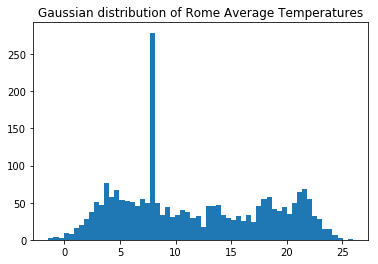

In [32]:
import matplotlib.pyplot as plt

rome_temps = data["Rome"]["AverageTemperature"]

plt.hist(rome_temps, bins=int(180/3))
plt.title('Gaussian distribution of Rome Average Temperatures')
plt.show()


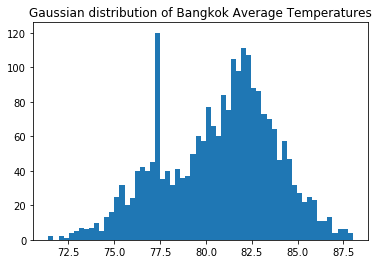

In [33]:
bangkok_temps = data["Bangkok"]["AverageTemperature"]

plt.hist(bangkok_temps, bins=int(180/3))
plt.title('Gaussian distribution of Bangkok Average Temperatures')
plt.show()


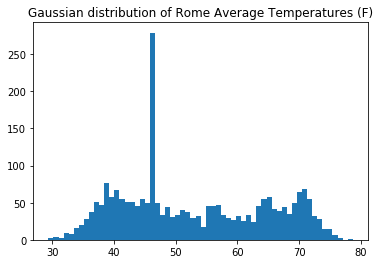

In [34]:
def fromCtoF(x):
    return 1.8*x+32

rome_temps_f = [fromCtoF(x) for x in rome_temps]
plt.hist(rome_temps_f, bins=int(180/3))
plt.title('Gaussian distribution of Rome Average Temperatures (F)')
plt.show()
